Module import

In [ ]:
import pandas as pd  # dataframe
import numpy as np  # array
import matplotlib.pyplot as plt # plot
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # stemmer
import pickle # save
import nltk # tokenize
nltk.download('stopwords') # stopword
from nltk.corpus import stopwords # stopword
stopwords_id = stopwords.words('indonesian') # stopword
from sklearn.feature_extraction.text import CountVectorizer # bag of word
from sklearn.feature_extraction.text import TfidfVectorizer # tfidf
from sklearn.feature_selection import SelectKBest # feature selection
from sklearn.feature_selection import chi2 # feature selection
from sklearn.model_selection import train_test_split # split data
from sklearn.naive_bayes import MultinomialNB # naive bayes
from joblib import dump,load # save model
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import classification_report # report
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.model_selection import ShuffleSplit # cross validation




%matplotlib inline

In [40]:
!pip install  -q Sastrawi

In [ ]:
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

In [ ]:
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv

In [ ]:
len(stopwords_id)

In [ ]:
stopwords_id

In [ ]:
data=pd.read_csv('Asset/dataset_sms_spam_v1.csv')

data.head()

In [ ]:
data.info()

In [ ]:
data_review = data[['teks']]
data_review.head()

In [ ]:
data["label"].value_counts()

In [ ]:
print('Total keseluruhan Sms :',data.shape[0], 'Data')
print('terdiri dari[label]:')
print('1. Sms Normal :',data[data.label == 0].shape[0],'data')
print('1. Sms Penipuan :',data[data.label == 1].shape[0],'data')
print('1. Sms Promo :',data[data.label == 2].shape[0],'data')

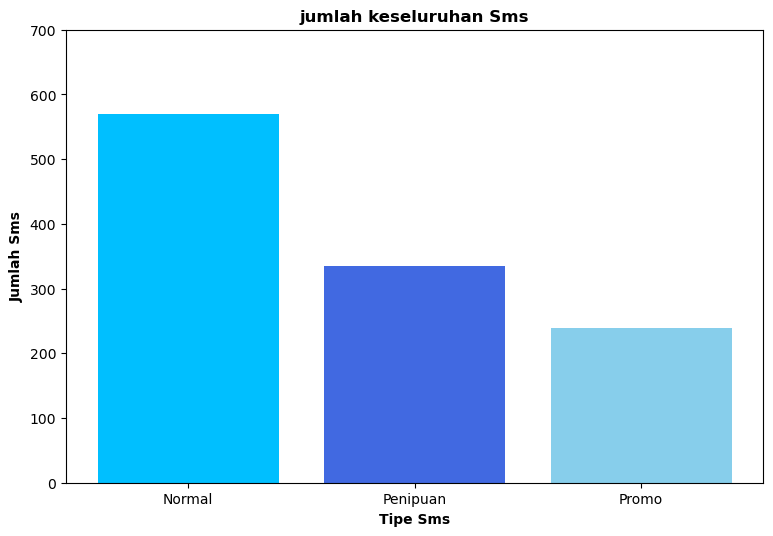

In [7]:
height = data['label'].value_counts()
labels = ['Normal', 'Penipuan','Promo',]
y_pos = np.arange(len(labels))

plt.figure(figsize=(9,6), dpi=100)
plt.ylim(0,700)
plt.title('jumlah keseluruhan Sms', fontweight='bold')
plt.xlabel('Tipe Sms', fontweight='bold')
plt.ylabel('Jumlah Sms', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

Fungsi

In [11]:
import re

# Buat fungsi untuk melakukan case folding
def casefolding(text):
  text = text.lower()                                 # Ubah jadi lowercase
  text = re.sub(r'https?://\S+|www\.\S+', '', text)   # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)             # Menghapus karakter angka
  text = re.sub(r'[^\w\s]', '', text)                 # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [9]:
key_norm = pd.read_csv('Asset/key_norm.csv')

# Buat fungsi untuk melakukan word normalization
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [12]:
def remove_stopwords(text):
  clean_word = []
  all_text = text.split()
  for word in all_text:
    if word not in stopwords_id:
      clean_word.append(word)
  return ' '.join(clean_word)

In [13]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_text = data['teks'].iloc[100]
case_folding = casefolding(raw_text)
word_normalization = text_normalize(case_folding)
stopwords_removal = remove_stopwords(word_normalization)
text_stemming = stemming(stopwords_removal)



print('Raw text\t: ', raw_text)
print('Case folding\t: ', case_folding)
print('normalization\t:', word_normalization)
print('Stopwords removal\t:', stopwords_removal)
print('Stemming\t: ', text_stemming)

In [18]:
def text_preprocessing(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text

In [19]:
%%time
data['clean_teks'] = data['teks'].apply(text_preprocessing)

Wall time: 3min 48s


In [ ]:
data.head()

In [21]:
data.to_csv('Asset/clean_data.csv')

In [ ]:
x = data['clean_teks']
y = data['label']

x

In [ ]:
y

In [24]:
bow =CountVectorizer(ngram_range=(1,1))
bow.fit(x)

CountVectorizer()

In [25]:
len(bow.get_feature_names_out())

3256

In [26]:
bow.get_feature_names_out()

array(['aa', 'aamiiiin', 'aamiin', ..., 'zjt', 'zona', 'ztkm'],
      dtype=object)

In [ ]:
x_bow = bow.transform(x).toarray()
x_bow

In [28]:
data_bow = pd.DataFrame(x_bow, columns=bow.get_feature_names_out())
data_bow

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
with open('Asset/hasil_bow.pickle', 'wb') as f:
  pickle.dump(bow, f)

In [31]:
tf_idf =TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(x)

x_tf_idf = tf_idf.transform(x)

In [32]:
len(tf_idf.get_feature_names_out())

3256

In [33]:
tf_idf.get_feature_names_out()

array(['aa', 'aamiiiin', 'aamiin', ..., 'zjt', 'zona', 'ztkm'],
      dtype=object)

In [34]:
x_tf_idf = tf_idf.transform(x).toarray()
x_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
data_tf_idf = pd.DataFrame(x_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
with open('Asset/hasil_tf_idf.pickle', 'wb') as f:
  pickle.dump(tf_idf, f)

Fiture Seleksi

In [37]:
x = np.array(data_tf_idf)
y = np.array(y)

In [38]:
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(x, y) 
  
# Reduced features 
print('Original feature number:', x.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 3256
Reduced feature number: 1000


In [39]:
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.835608
1,0.419698
2,1.558607
3,0.716455
4,0.800674
...,...
3251,1.180239
3252,0.503162
3253,0.716455
3254,2.917381


In [40]:
feature = tf_idf.get_feature_names_out()
data_chi2['teks'] = feature
data_chi2

,nilai,teks
0,0.835608,aa
1,0.419698,aamiiiin
2,1.558607,aamiin
3,0.716455,ab
4,0.800674,abadi
...,...,...
3251,1.180239,zalora
3252,0.503162,zarkasi
3253,0.716455,zjt
3254,2.917381,zona


In [41]:
data_chi2.sort_values(by=['nilai'], ascending=False).head(10)

,nilai,teks
2089,47.458531,paket
942,47.106233,gb
1031,46.312452,hadiah
1550,44.568678,kuota
2179,39.429089,pin
1487,34.448410,klik
2439,34.081988,resmi
1970,33.579364,nomor
1764,33.388862,menang
323,33.308745,beli


Mask feature

In [42]:
mask = chi2_features.get_support()
mask

array([False, False,  True, ..., False,  True, False])

In [43]:
new_feature = []
for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature
selected_feature

['aamiin',
 'agam',
 'agen',
 'ags',
 'agst',
 'agt',
 'agtskinfodlj',
 'agun',
 'agustuskunjungi',
 'ajak',
 'akses',
 'aktif',
 'aktivasi',
 'alam',
 'alamsyah',
 'aliando',
 'all',
 'aman',
 'amanda',
 'an',
 'anda',
 'andabch',
 'andika',
 'andromax',
 'angga',
 'angpaopoinsenyum',
 'angsur',
 'anrasto',
 'ap',
 'apa',
 'aplikasi',
 'app',
 'apps',
 'appsinapps',
 'argo',
 'armada',
 'artha',
 'artisartis',
 'arya',
 'as',
 'asa',
 'asli',
 'ass',
 'assalamualaikum',
 'at',
 'atas',
 'ato',
 'aug',
 'augsept',
 'avanza',
 'axiata',
 'axis',
 'axisnet',
 'ayah',
 'ayam',
 'ayo',
 'bagi',
 'baik',
 'bakmi',
 'balas',
 'ball',
 'bandung',
 'bandungmulai',
 'bang',
 'banget',
 'bank',
 'banting',
 'banyak',
 'bapa',
 'bareng',
 'barokahmp',
 'baru',
 'baruqskrng',
 'baskin',
 'batas',
 'batin',
 'bawa',
 'bayar',
 'bb',
 'bbm',
 'bch',
 'bebek',
 'beda',
 'belanja',
 'beli',
 'beliau',
 'belikan',
 'bentar',
 'berangkat',
 'beres',
 'berkat',
 'berlakupromo',
 'berrybenka',
 'besok',
 

In [44]:
tf_idf.vocabulary_

{'promo': 2296,
 'beli': 323,
 'paket': 2089,
 'flash': 870,
 'gb': 942,
 'my': 1881,
 'telkomsel': 2877,
 'app': 162,
 'extra': 841,
 'kuota': 1550,
 'lte': 1653,
 'telpon': 2880,
 'mnthr': 1832,
 'buru': 480,
 'cek': 521,
 'tselmemytsel': 3016,
 'sk': 2693,
 'rupiah': 2505,
 'ribu': 2454,
 'spesial': 2752,
 'pilih': 2176,
 'aktif': 66,
 'sd': 2559,
 'november': 1990,
 'pulang': 2331,
 'hormat': 1117,
 'sisa': 2686,
 'kb': 1411,
 'download': 752,
 'mytelkomsel': 1883,
 'apps': 167,
 'kuotabeli': 1551,
 'hubung': 1141,
 'skb': 2694,
 'ekstra': 804,
 'pulsa': 2333,
 'rb': 2393,
 'internet': 1221,
 'bulan': 466,
 'sjk': 2692,
 'augsept': 217,
 'detail': 665,
 'iring': 1243,
 'tarif': 2843,
 'panjang': 2102,
 'hits': 1106,
 'armada': 180,
 'curi': 600,
 'hati': 1070,
 'tekan': 2871,
 'okcall': 2042,
 'informasi': 1192,
 'eks': 801,
 'loh': 1640,
 'internetan': 1222,
 'pakai': 2087,
 'volume': 3132,
 'ultima': 3069,
 'mbhr': 1739,
 'harga': 1058,
 'tariflokasi': 2845,
 'tselmefl': 3014,
 '

In [45]:
kbest_feature = {}

for (k,v) in tf_idf.vocabulary_.items():
  if k in selected_feature:
    kbest_feature[k] = v

In [46]:
kbest_feature

{'promo': 2296,
 'beli': 323,
 'paket': 2089,
 'flash': 870,
 'gb': 942,
 'my': 1881,
 'telkomsel': 2877,
 'app': 162,
 'extra': 841,
 'kuota': 1550,
 'lte': 1653,
 'telpon': 2880,
 'mnthr': 1832,
 'buru': 480,
 'cek': 521,
 'tselmemytsel': 3016,
 'sk': 2693,
 'rupiah': 2505,
 'ribu': 2454,
 'spesial': 2752,
 'pilih': 2176,
 'aktif': 66,
 'sd': 2559,
 'november': 1990,
 'hormat': 1117,
 'sisa': 2686,
 'kb': 1411,
 'download': 752,
 'mytelkomsel': 1883,
 'apps': 167,
 'kuotabeli': 1551,
 'hubung': 1141,
 'skb': 2694,
 'ekstra': 804,
 'pulsa': 2333,
 'rb': 2393,
 'internet': 1221,
 'bulan': 466,
 'sjk': 2692,
 'augsept': 217,
 'detail': 665,
 'iring': 1243,
 'tarif': 2843,
 'panjang': 2102,
 'hits': 1106,
 'armada': 180,
 'curi': 600,
 'tekan': 2871,
 'okcall': 2042,
 'informasi': 1192,
 'eks': 801,
 'loh': 1640,
 'internetan': 1222,
 'pakai': 2087,
 'volume': 3132,
 'ultima': 3069,
 'mbhr': 1739,
 'harga': 1058,
 'tariflokasi': 2845,
 'tselmefl': 3014,
 'jr': 1330,
 'baru': 283,
 'noah'

In [47]:
data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aamiin,agam,agen,ags,agst,agt,agtskinfodlj,agun,agustuskunjungi,ajak,...,yesok,your,yrkz,ytg,ythmohon,ythsaya,yuk,yunit,zalora,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
with open('Asset/kbest_feature.pickle', 'wb') as f:
  pickle.dump(selected_feature, f)

MODELING

In [51]:
x_train, x_test, y_train, y_test = train_test_split(data_selected_feature, y, test_size=0.2, random_state=42)

In [50]:
algorithm = MultinomialNB()
model = algorithm.fit(x_train, y_train)

dump(model,filename= 'Asset/model_1.joblib')

['Asset/model_1.joblib']

In [52]:
model_pred = model.predict(x_test)
model_pred

array([2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0,
       0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 2, 0,
       1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0,
       2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 1,
       0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 2,
       1, 0, 1, 0, 0, 1, 2, 2, 0], dtype=int64)

In [53]:
y_test

array([2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0,
       0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0,
       1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1,
       2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1,
       0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1,
       0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 1, 2, 2, 0], dtype=int64)

Evaluation Model

In [54]:
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Accuracy pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 204
Jumlah prediksi salah	: 25
Accuracy pengujian	: 89.08296943231441 %


In [55]:
cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[94  2  3]
 [ 9 69  4]
 [ 6  1 41]]


In [56]:
print('classification report:\n', classification_report(y_test, model_pred))

classification report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        99
           1       0.96      0.84      0.90        82
           2       0.85      0.85      0.85        48

    accuracy                           0.89       229
   macro avg       0.89      0.88      0.88       229
weighted avg       0.90      0.89      0.89       229



In [57]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Accuracy setiap split:', cv_accuracy, '\n')
print('Rata-rata Accuracy cross validation:', avg_accuracy)

Accuracy setiap split: [0.91266376 0.90829694 0.930131   0.89956332 0.90829694 0.91266376
 0.95196507 0.89519651 0.89519651 0.89519651] 

Rata-rata Accuracy cross validation: 0.9109170305676857


Deployment

In [58]:
model = load('Asset/model_1.joblib')
vocab = pickle.load(open('Asset/kbest_feature.pickle', 'rb'))

FUNGSI PENGECEKAN SMS UNTUK CEK BISA DI ISI DI BARIS input_text

In [ ]:
input_text = " " #@param {type:"string"}

pre_input_text = text_preprocessing(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('Hasil Text Preprocessing :', pre_input_text)

if (result==0):
  sms = 'SMS Normal'
elif (result==1):
  sms = 'SMS Fraud'
else:
  sms = 'SMS Promo'

print('Hasil prediksi', input_text, ' adalah', sms)